In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

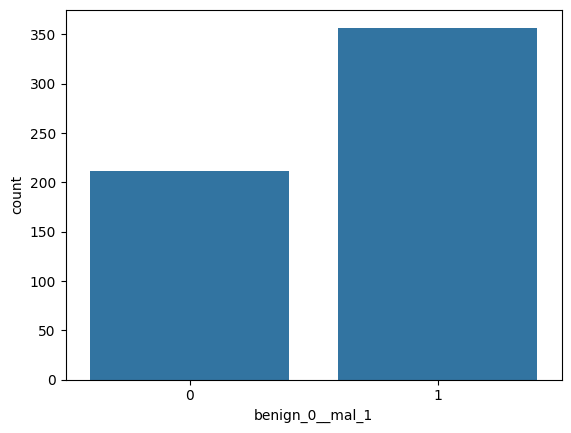

In [ ]:
sns.countplot(data = df, x = 'benign_0__mal_1')

<Axes: >

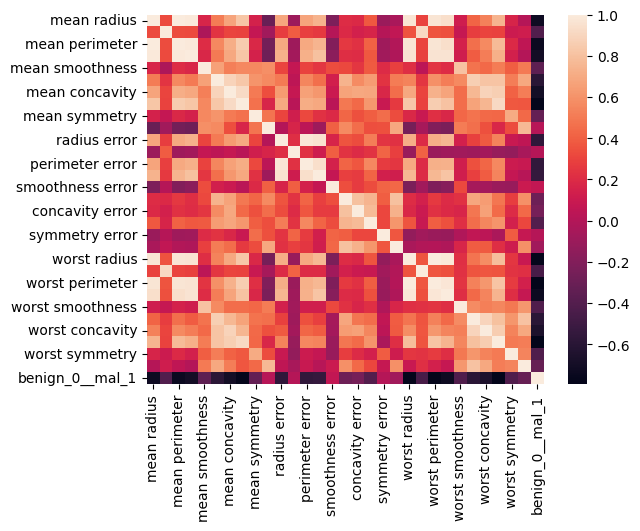

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

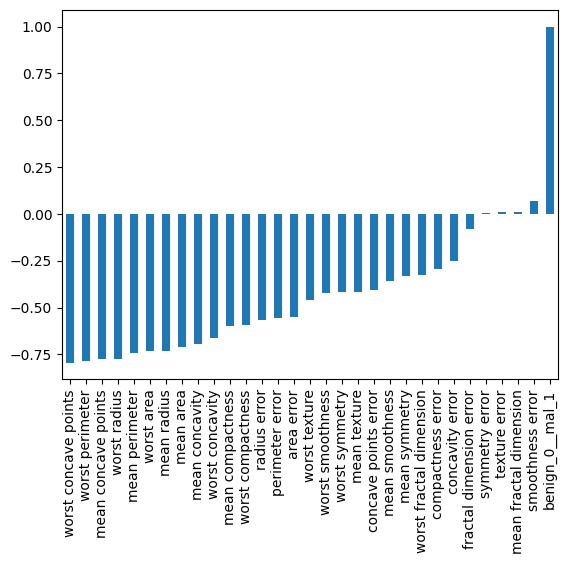

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

#Train Test Split

In [ ]:
X = df.drop('benign_0__mal_1', axis = 1).values

In [ ]:
y  = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =  101)

Lets Scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[0.26317335, 0.29861346, 0.2461044 , ..., 0.29010309, 0.27951902,
        0.11025843],
       [0.34536915, 0.21203923, 0.32136119, ..., 0.25611684, 0.22866154,
        0.11347239],
       [0.29008269, 0.22387555, 0.27070086, ..., 0.28298969, 0.28760103,
        0.09477896],
       ...,
       [0.51954597, 0.46060196, 0.52553979, ..., 0.68591065, 0.14508181,
        0.44182081],
       [0.22696805, 0.28643896, 0.22772692, ..., 0.48659794, 0.21584861,
        0.24701561],
       [0.41680121, 0.38451133, 0.41303892, ..., 0.73333333, 0.28346146,
        0.32638069]])

#Create a Deep Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))#Input Layer
model.add(Dense(units = 15, activation = 'relu'))#Hideen Layer

model.add(Dense(units = 1, activation = 'sigmoid'))#Output layer

model.compile(loss  = 'binary_crossentropy', optimizer = 'adam')



#Let's Train the model

In [ ]:
model.fit(x = X_train,
          y = y_train,
          epochs = 600,
          validation_data = (X_test, y_test),
          verbose = 1)

Epoch 1/600
14/14 [==============================] - 1s 20ms/step - loss: 0.6891 - val_loss: 0.6792
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6627 - val_loss: 0.6573
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6425 - val_loss: 0.6371
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6217 - val_loss: 0.6135
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5936 - val_loss: 0.5824
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5640 - val_loss: 0.5475
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5287 - val_loss: 0.5097
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4906 - val_loss: 0.4700
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4511 - val_loss: 0.4282
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4123 - val_loss: 0.3858
Epoch 1

In [ ]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
model_loss.head()

,loss,val_loss
0,0.689067,0.679241
1,0.662682,0.657277
2,0.642532,0.637055
3,0.621652,0.613527
4,0.593566,0.582435


In [ ]:
model_loss.max()

loss        0.689067
val_loss    0.679241
dtype: float64

<Axes: >

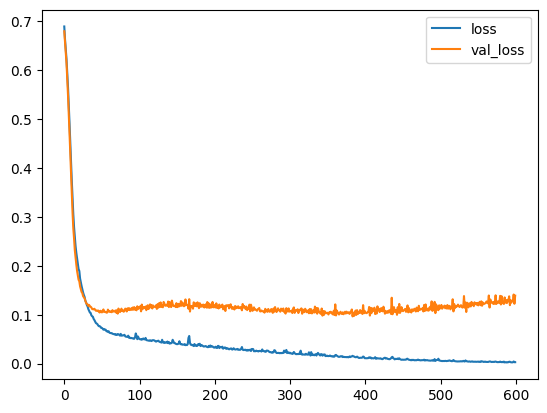

In [ ]:
model_loss.plot()

#Early Stopping

In [ ]:
model_e = Sequential()

model_e.add(Dense(units = 30, activation = 'relu'))#Input Layer
model_e.add(Dense(units = 15, activation = 'relu'))#Hideen Layer

model_e.add(Dense(units = 1, activation = 'sigmoid'))#Output layer

model_e.compile(loss  = 'binary_crossentropy', optimizer = 'adam')



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earl_stop =EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1, patience = 25)

In [ ]:
model_e.fit(x = X_train,
          y = y_train,
          epochs = 600,
          validation_data = (X_test, y_test),
          verbose = 1,
          callbacks = [earl_stop])

Epoch 1/600
14/14 [==============================] - 1s 22ms/step - loss: 0.6985 - val_loss: 0.6626
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6477 - val_loss: 0.6227
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6083 - val_loss: 0.5858
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5747 - val_loss: 0.5507
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5428 - val_loss: 0.5175
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5086 - val_loss: 0.4860
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4756 - val_loss: 0.4488
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4414 - val_loss: 0.4121
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4047 - val_loss: 0.3749
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3670 - val_loss: 0.3372
Epoch 11

In [ ]:
e_model_loss = pd.DataFrame(model_e.history.history)

<Axes: >

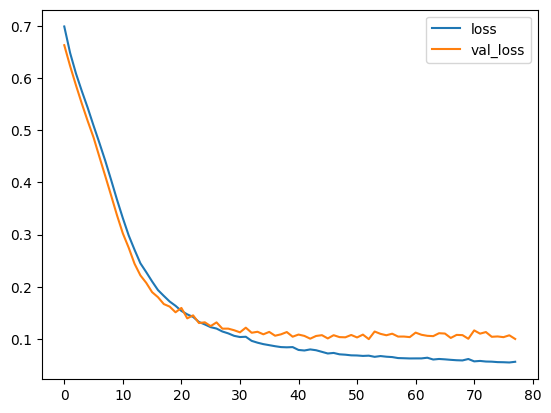

In [ ]:
e_model_loss.plot()

#Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model_d = Sequential()

model_d.add(Dense(units = 30, activation = 'relu'))#Input Layer
model_d.add(Dropout(0.5))

model_d.add(Dense(units = 15, activation = 'relu'))#Hideen Layer
model_d.add(Dropout(0.5))

model_d.add(Dense(units = 1, activation = 'sigmoid'))#Output layer
model_d.compile(loss  = 'binary_crossentropy', optimizer = 'adam')



In [ ]:
model_d.fit(x = X_train,
          y = y_train,
          epochs = 600,
          validation_data = (X_test, y_test),
          verbose = 1,
          callbacks = [earl_stop])

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.7124 - val_loss: 0.6676
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6873 - val_loss: 0.6397
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6501 - val_loss: 0.6165
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6305 - val_loss: 0.5905
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6073 - val_loss: 0.5599
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5964 - val_loss: 0.5303
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5699 - val_loss: 0.5045
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5492 - val_loss: 0.4825
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5383 - val_loss: 0.4561
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5258 - val_loss: 0.4343
Epoch 11

In [ ]:
d_model_loss = pd.DataFrame(model_d.history.history)

<Axes: >

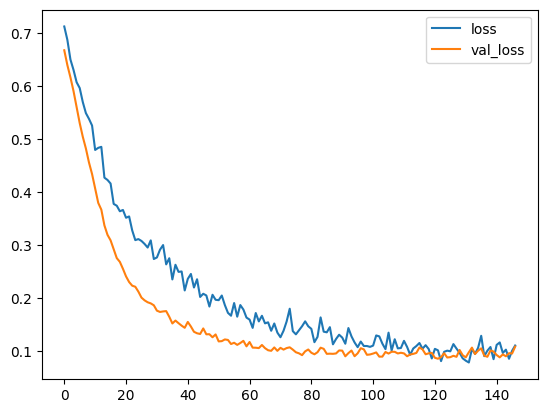

In [ ]:
d_model_loss.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


5/5 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
confusion_matrix(y_test, predictions)

array([[54,  1],
       [ 4, 84]])

In [ ]:
predictions_e = (model_e.predict(X_test) > 0.5).astype("int32")


5/5 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test,predictions_e))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
confusion_matrix(y_test, predictions_e)

array([[54,  1],
       [ 2, 86]])

In [ ]:
predictions_d = (model_d.predict(X_test) > 0.5).astype("int32")


5/5 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test,predictions_d))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
confusion_matrix(y_test, predictions_d)

array([[54,  1],
       [ 3, 85]])